### Trabalho de Ciência de Redes - Simulação de Epidemias

#### Alunos:
- Isaías Gouvêa Gonçalves
- Bruno Ferreira
- Elisa Soares

In [19]:
# Configuração do Ambiente

import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

---
## Exercício 1
Gere uma rede aleatória (Erdos-Renyi) com $10000$ vértices e grau médio $<k> = 20$.
Comece com $5$ vértices aleatórios infectados e faça a simulação computacional da propagação
da infecção pelo modelo SIS com os parâmetros abaixo.

***a.*** $\beta$ = 0.02 e $\mu$ = 0.1

***b.*** $\beta$ = 0.02 e $\mu$ = 0.4

***c.*** $\beta$ = 0.02 e $\mu$ = 0.5

Em cada caso, descreva o que você encontrou nas simulações e compare com o esperado pela
teoria

In [16]:
"""
Em uma rede aleatória de N vértices e grau médio k,
a probabilidade p de uma arestas entre quaisquer dois vértices existir
é dada por:
p = k / (N-1)

Para fins computacionais iremos utilizar a aproximação
p = k / N

"""
# -- Parâmetros --
N = 10000     # Número de Nós
k = 20        # Grau médio
p = k / N     # Probabilidade de uma aresta existir
beta = 0.02   # Taxa de infecção (constante)


# Vamos agora criar a rede que iremos utilizar
base_G = nx.erdos_renyi_graph(N, p)


# Vamos selecioanar 5 vértices aleatórios para infectar
initially_infected_num = 5
initially_infected = random.sample(range(N), initially_infected_num)


scenarios = {
    0.1 : np.zeros(1),
    0.4 : np.zeros(1),
    0.5 : np.zeros(1)
}



In [23]:
for mu in scenarios.keys():

    max_iter = 1000
    hist_infections = np.zeros(max_iter + 1)
    hist_infections[0] = initially_infected_num

    states = np.zeros(N)

    for inf in initially_infected:
        states[inf] = 1

    G = base_G.copy()

    for t in range(max_iter): # Loop principal

        next_states = states.copy() # Copiano a lista para atualizar

        # Etapa de recuperação
        for i in range(N):
            if states[i] == 1:
                if random.random() < mu: # Verificar se vai se recuperar
                    next_states[i] = 0

        # Etapa de infecção
        for i in range(N):
            if states[i] == 1:
                for neigh in G.neighbors(i):
                    if states[neigh] == 0 and random.random() < beta:
                        next_states[neigh] = 1 # Infectado

        states = next_states
        num_infected = np.sum(states)
        hist_infections[t + 1] = num_infected

        if num_infected == 0:
            break

    
    scenarios[mu] = hist_infections


print(scenarios.items())

    

dict_items([(0.1, array([5.000e+00, 6.000e+00, 1.100e+01, ..., 7.164e+03, 7.141e+03,
       7.059e+03])), (0.4, array([5., 7., 6., ..., 0., 0., 0.])), (0.5, array([5., 6., 6., ..., 0., 0., 0.]))])


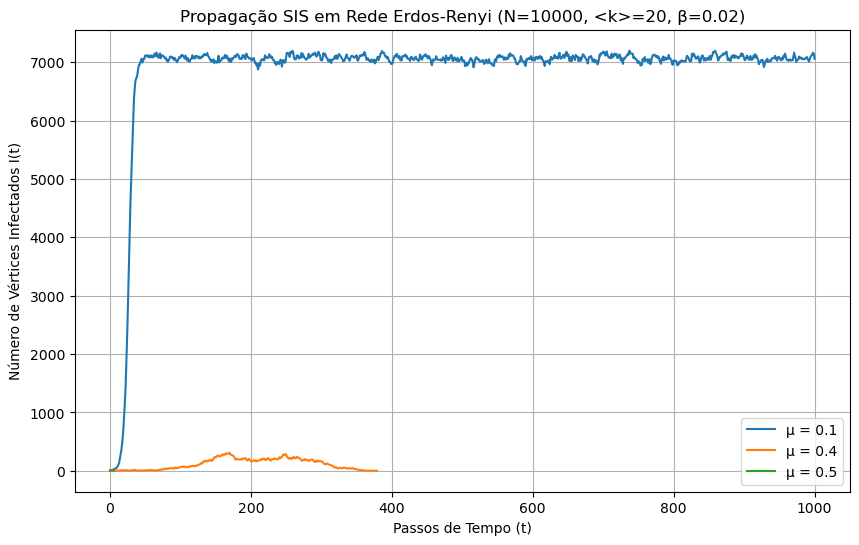

In [24]:
plt.figure(figsize=(10, 6))
plt.title(f'Propagação SIS em Rede Erdos-Renyi (N=10000, <k>=20, β=0.02)')
plt.xlabel('Passos de Tempo (t)')
plt.ylabel('Número de Vértices Infectados I(t)')

# Itera sobre os cenários e plota cada um
for mu, history in scenarios.items():
    # Remove os zeros extras do array, mantendo apenas a simulação
    history_trimmed = history[history != 0]
    
    # Adiciona a última etapa (0 infectados) se a simulação parou
    if history_trimmed[-1] == 0 and len(history) > len(history_trimmed):
        history_trimmed = history[:len(history_trimmed) + 1]

    plt.plot(history_trimmed, label=f'μ = {mu}')

plt.grid(True)
plt.legend()
plt.show()

No nosso exemplo o limiar crítico é $\lambda _c = \frac{1}{<k>} = 0.05$

### a\)
Podemos perceber que o caso com $\mu = 0.1$ teve um cescimento de início exponencial no número de infectados, até que estabilizasse em uma faixa de 7000 mil infectados em média, mantendo isso até o final do experimento. 

Aqui a taxa efetiva de infecção é $\lambda = \frac{\beta}{\mu} = \frac{0.02}{0.1} = 0.2 > \lambda _c$

Com isso, podemos concluir que a doença atinge um estado endêmico permanente

### b\)
No caso de $\mu = 0.4$ já temos um exemplo claro de uma curva de infecção que tem um ápice próximo da iteração $t = 150$, e depois diminui a ponto de que antes da iteração $t = 400$ já não há nenhum infectado.  

Aqui a taxa efetiva de infecção é $\lambda = \frac{\beta}{\mu} = \frac{0.02}{0.4} = 0.05 = \lambda _c$

Portanto, com uma taxa de infecção igual ao limiar crítico, temos um processo de infecção estocástico equilibrado

### c\)
Por fim, para $\mu = 0.5$, a alta taxa de recuperação garantiu que a infecção não se proliferasse, a ponto de que o número de infectados aumentasse em apenas dois e logo decaísse para zero antes da décima iteração.

Aqui a taxa efetiva de infecção é $\lambda = \frac{\beta}{\mu} = \frac{0.02}{0.5} = 0.04 < \lambda _c$

Essa taxa de infecção não permite que a doença de espalhe, e faz com que ela desapareça quase que imediatamente

Gráficos detalhados podem ser vistos abaixo:

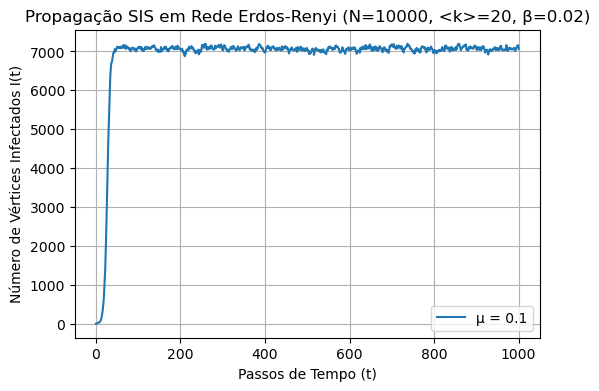

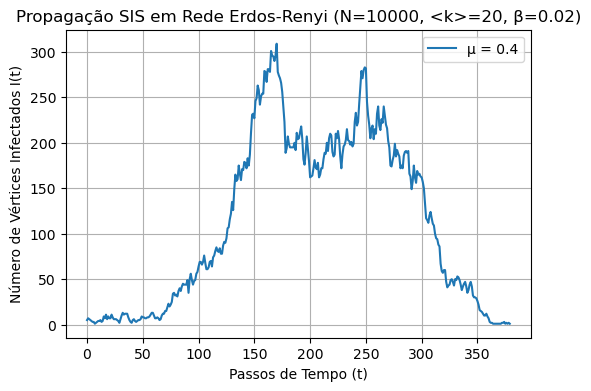

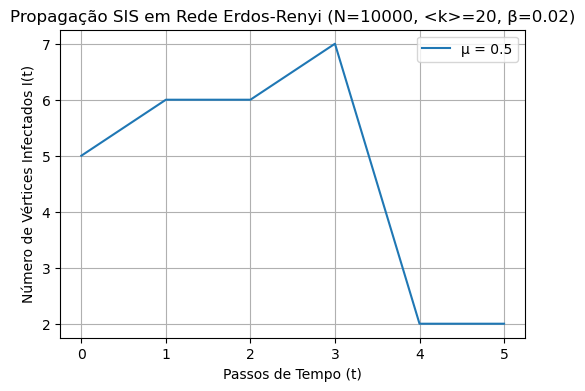

In [25]:
for mu, history in scenarios.items():
    # Remove os zeros extras do array, mantendo apenas a simulação
    history_trimmed = history[history != 0]
    
    # Adiciona a última etapa (0 infectados) se a simulação parou
    if history_trimmed[-1] == 0 and len(history) > len(history_trimmed):
        history_trimmed = history[:len(history_trimmed) + 1]

    plt.figure(figsize=(6, 4))
    plt.title(f'Propagação SIS em Rede Erdos-Renyi (N=10000, <k>=20, β=0.02)')
    plt.xlabel('Passos de Tempo (t)')
    plt.ylabel('Número de Vértices Infectados I(t)')

    plt.plot(history_trimmed, label=f'μ = {mu}')
    plt.grid(True)
    plt.legend()
    plt.show()